## Question 3

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [19]:
img = cv.imread('a1images/a1images/highlights_and_shadows.jpg')
assert img is not None
img_lab=cv.cvtColor(img, cv.COLOR_BGR2LAB)
img_rgb=cv.cvtColor(img, cv.COLOR_BGR2RGB)


In [27]:
L, a, b = cv.split(img_lab)
gamma = 0.8
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_gamma = cv.LUT(L, t)



In [28]:
#Merge the modified L channel with the original a and b channels
img_lab_gamma = cv.merge((L_gamma, a, b))
img_modified = cv.cvtColor(img_lab_gamma, cv.COLOR_LAB2BGR)

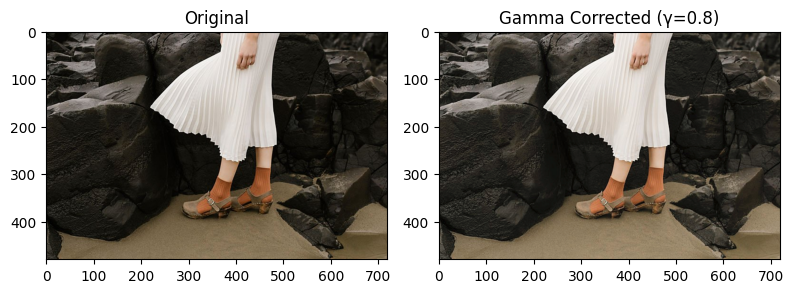

In [30]:
# plot the original and the gamma corrected images
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
axs[0].imshow(img_rgb)
axs[0].set_title('Original')
axs[1].imshow(cv.cvtColor(img_modified, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
plt.tight_layout()
plt.show()


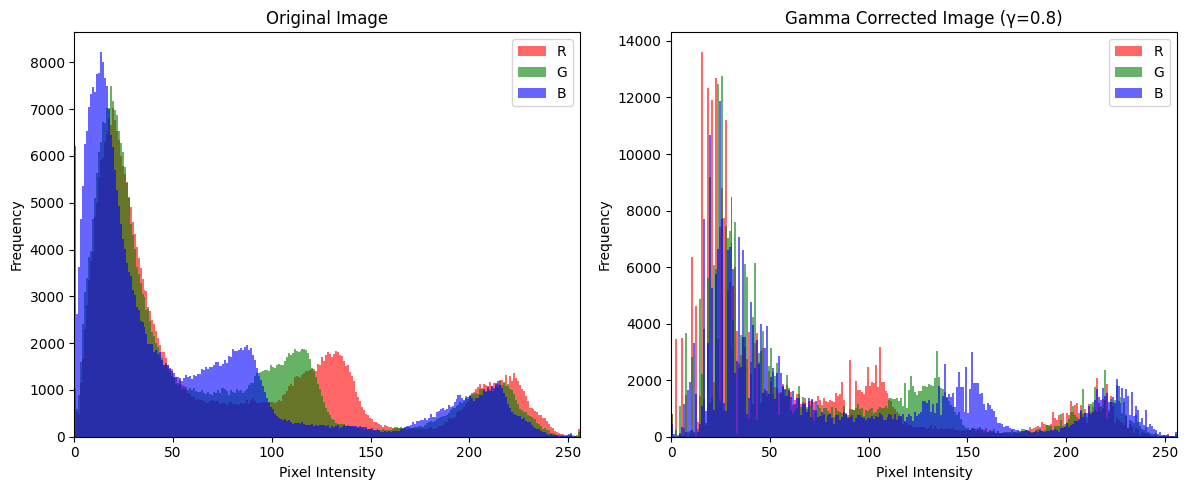

In [35]:
colors = ('r', 'g', 'b')  # Color channels
plt.figure(figsize=(12, 5))

# Original image histograms
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    channel_flat = img_rgb[:, :, i].flatten()
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6, label=col.upper())
plt.title('Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.legend()

# Gamma corrected image histograms
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    channel_flat = img_modified[:, :, i].flatten()
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6, label=col.upper())
plt.title(f'Gamma Corrected Image (γ={gamma})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.legend()

plt.tight_layout()
plt.show()


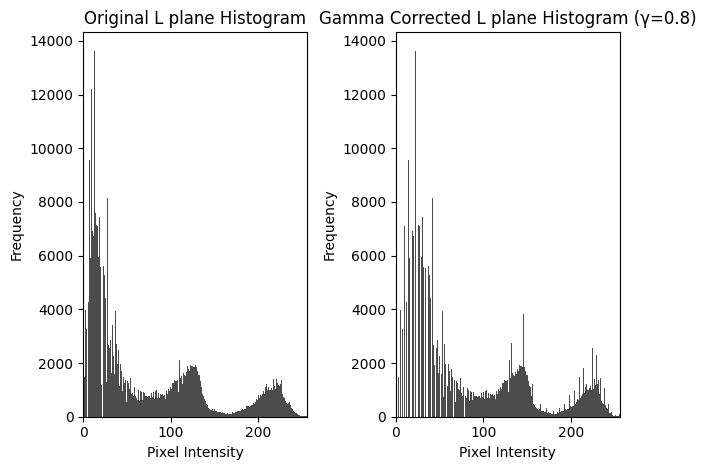

In [37]:
# Plot histogram of the original L plane (lightness) channel
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), bins=256, range=(0, 256), color='black', alpha=0.7)
plt.title("Original L plane Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])  

# Plot histogram of the gamma corrected L plane
plt.subplot(1, 2, 2)
plt.hist(L_gamma.ravel(), bins=256, range=(0, 256), color='black', alpha=0.7)
plt.title(f"Gamma Corrected L plane Histogram (γ={gamma})")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()
